In [1]:
# Importar as bibliotecas

import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

## Lendo o dataset

In [2]:
df0 = pd.read_csv('Bitcoin_tweets.csv')
df0.info()

/home/ffreller/.conda/envs/teste1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (4,5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830476 entries, 0 to 2830475
Data columns (total 13 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_name         object
 1   user_location     object
 2   user_description  object
 3   user_created      object
 4   user_followers    object
 5   user_friends      object
 6   user_favourites   object
 7   user_verified     object
 8   date              object
 9   text              object
 10  hashtags          object
 11  source            object
 12  is_retweet        object
dtypes: object(13)
memory usage: 280.7+ MB


In [3]:
df0.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [4]:
df0.head(5)

user_name    user_location  \
0                             DeSota Wilson      Atlanta, GA   
1                                  CryptoND              NaN   
2                                 Tdlmatias  London, England   
3                      Crypto is the future              NaN   
4  Alex Kirchmaier üá¶üáπüá∏üá™ #FactsSuperspreader           Europa   

                                    user_description         user_created  \
0  Biz Consultant, real estate, fintech, startups...  2009-04-26 20:05:09   
1  üòé BITCOINLIVE is a Dutch platform aimed at inf...  2019-10-17 20:12:10   
2  IM Academy : The best #forex, #SelfEducation, ...  2014-11-10 10:50:37   
3  I will post a lot of buying signals for BTC tr...  2019-09-28 16:48:12   
4  Co-founder @RENJERJerky | Forbes 30Under30 | I...  2016-02-03 13:15:55   

  user_followers user_friends user_favourites user_verified  \
0         8534.0         7605            4838         False   
1         6769.0         1532           25483         False   
2          128.0          332             924         False   
3          625.0          129              14         False   
4         1249.0         1472           10482         False   

                  date                                               text  \
0  2021-02-10 23:59:04  Blue Ridge Bank shares halted by NYSE after #b...   
1  2021-02-10 23:58:48  üòé Today, that's this #Thursday, we will do a "...   
2  2021-02-10 23:54:48  Guys evening, I have read this article about B...   
3  2021-02-10 23:54:33  $BTC A big chance in a billion! Price: \487264...   
4  2021-02-10 23:54:06  This network is secured by 9 508 nodes as of t...   

                                    hashtags               source is_retweet  
0                                ['bitcoin']      Twitter Web App      False  
1  ['Thursday', 'Btc', 'wallet', 'security']  Twitter for Android      False  
2                                        NaN      Twitter Web App      False  
3         ['Bitcoin', 'FX', 'BTC', 'crypto']              dlvr.it      False  
4                                    ['BTC']      Twitter Web App      False

Como o objetivo deste notebook √© analisar o perfil dos usu√°rio (e n√£o seus tweets), vamos analisar as colunas referente ao usu√°rio: user_name, user_location, user_description, user_followers, user_favourites, user_friends, user_verified. Apesar de ser referente ao tweet, tamb√©m analisaremos a coluna source, j√° que d√° informa√ß√µes sobre o usu√°rio

## Tratar colunas

In [5]:
## Corrigindo colunas de data
df0['date'] = pd.to_datetime(df0['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df0['user_created'] = pd.to_datetime(df0['user_created'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [6]:
## Corrigindo user_verified
df0['user_verified'] = df0['user_verified'].apply(lambda x: (True if x=='True' else False) if type(x)==str else x).astype(bool)

In [7]:
# Limpar colunas num√©ricas
def clean_number_column(value):
    try:
        return float(value)
    except:
        return float("NaN")

df0['user_favourites'] = df0['user_favourites'].apply(clean_number_column)
df0['user_friends'] = df0['user_friends'].apply(clean_number_column)
df0['user_followers'] = df0['user_followers'].apply(clean_number_column)

## Agrupar dados

Vamos agrupar o dataset por usu√°rio, para que possamos olhar para suas caracter√≠sticas independentemente do n√∫mero de tweets de cada usu√°rio. Como n√£o h√° um id √∫nico para cada um, vamos agrup√°-los usando a combina√ß√£o nome+user_created

In [8]:
group_dict = {
    'user_description':'last',
    'user_created':'min',
    'user_followers':'mean',
    'user_friends':'mean',
    'user_favourites':'mean',
    'user_verified':'max',
    'date':'count',
    'user_name':'last',
}
df_ = df0.sort_values('date').copy()
df_['id'] = df_['user_name'] + df_['user_created'].astype(str)
df1 = df_.groupby('id').agg(group_dict)
df1.rename(columns={'date':'tweet_count'}, inplace=True)

In [9]:
# Para user_location, vamos criar um agrupador que traz a √∫ltima localiza√ß√£o que o usu√°rio preencheu
def last_if_not_nan(values):
    for i in range(len(values)-1, -1, -1):
        value = values.iloc[i]
        if (str(value).lower() != 'nan') and (value != '') and (value != 'None') and (pd.isna(value) == False):
            return value
    return 'NaN'

df2 = df_[['id', 'user_location']].groupby('id').agg(last_if_not_nan)
df1['user_location'] = df2['user_location'].copy()

In [10]:
del df_, df2

## Analisar colunas

### user_verfified

In [11]:
print(f"{df1['user_verified'].mean():.3%} dos usu√°rios s√£o verificados")

0.692% dos usu√°rios s√£o verificados


### Date and user_created

In [12]:
df1['user_created'].dt.year.value_counts(1).sort_index()

1970.0    0.000006
2006.0    0.000104
2007.0    0.002396
2008.0    0.008554
2009.0    0.046941
2010.0    0.034366
2011.0    0.042568
2012.0    0.037863
2013.0    0.033831
2014.0    0.031935
2015.0    0.028994
2016.0    0.028751
2017.0    0.043884
2018.0    0.049263
2019.0    0.057991
2020.0    0.125407
2021.0    0.378173
2022.0    0.048971
Name: user_created, dtype: float64

In [13]:
len(df1[df1['user_created'].dt.year < 2006])

3

A maioria dos usu√°rios foi criada recentement -mais da metade deles entre 2019 e 2022. H√° 3 datas de cria√ß√£o no ano 1970, o que s√≥ pode ser maus registros, j√° que n√£o existia Twitter neste ano

<AxesSubplot:>

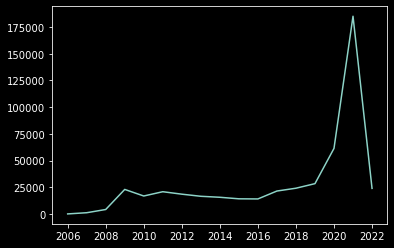

In [14]:
df1.loc[df1['user_created'].dt.year < 2006, 'user_created'] = pd.to_datetime('2009-01-01')
date_creatd_counts = df1['user_created'].dt.year.value_counts()
sns.lineplot(x=date_creatd_counts.index, y=date_creatd_counts.values)

### source

In [15]:
## 10 fontes mais comuns no dataset e sua porcentagem no dataset
df0['source'].value_counts(1).head(10)*100

Twitter for Android    30.070449
Twitter Web App        25.771901
Twitter for iPhone     19.181794
IFTTT                   1.498025
dlvr.it                 1.152006
TweetDeck               0.780480
ContentStudio.io        0.764207
Twitter for iPad        0.611910
HoBaBot                 0.464743
Hootsuite Inc.          0.417268
Name: source, dtype: float64

Nota-se que android+iphone representam quase 50% das fontes de todos os tweets

In [16]:
top_10 = df0['source'].value_counts().head(10).index
# Transformando valores que n√£o est√£o no top10 em "outros"
df0.loc[~df0['source'].isin(top_10), 'source'] = 'outros'
df0['source'] = pd.Categorical(df0['source'])
df0['source'].value_counts(1)*100

Twitter for Android    30.030567
Twitter Web App        25.737720
outros                 19.394264
Twitter for iPhone     19.156354
IFTTT                   1.496038
dlvr.it                 1.150478
TweetDeck               0.779445
ContentStudio.io        0.763193
Twitter for iPad        0.611099
HoBaBot                 0.464127
Hootsuite Inc.          0.416714
Name: source, dtype: float64

Fontes que n√£o est√£o no top 10 representam 19% das fontes do dataset. Usu√°rios, portanto, usam diversas fontes para publicar, mas as principais s√£o via aparelho m√≥vel

### user_favourites

In [17]:
df1['user_favourites'].describe().apply("{0:.2f}".format)

count     489613.00
mean        5226.87
std        18431.21
min            0.00
25%           90.00
50%          586.33
75%         3021.50
max      1248517.00
Name: user_favourites, dtype: object

Os usu√°rios t√™m uma m√©dia de 5226 favoritos. Mas, olhando pra mediana (586), percebe-se que a distribui√ß√£o √© assim√©trica positivamente -ou seja, usu√°rios com muitos favoritos est√£o puxando a m√©dia pra cima.

In [18]:
#Retirando outliers para olhar melhor para o coluna
iqr = df1['user_favourites'].quantile(0.75) - df1['user_favourites'].quantile(0.25)
upper_limit = df1['user_favourites'].quantile(0.75) + iqr*3
df1.loc[df1['user_favourites']>upper_limit, 'user_favourites'] = upper_limit

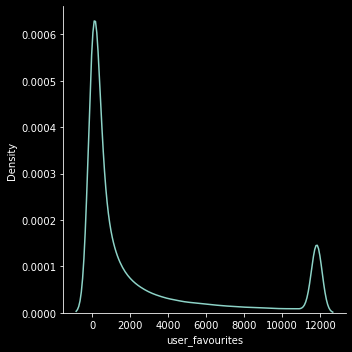

In [19]:
sns.displot(data=df1, x='user_favourites', kind='kde')

### user_friends

In [20]:
df1['user_friends'].describe().apply("{0:.2f}".format)

count     489612.00
mean         732.77
std         9139.72
min            0.00
25%           74.00
50%          236.00
75%          670.50
max      4199947.67
Name: user_friends, dtype: object

Assim como no caso dos favoritos, a m√©dia (732) √© bem maior que a mediana (236). Isso significa que a distribui√ß√£o √© assim√©trica positivamente.

In [21]:
#Retirando outliers para olhar melhor para o coluna
iqr = df1['user_friends'].quantile(0.75) - df1['user_friends'].quantile(0.25)
upper_limit = df1['user_friends'].quantile(0.75) + iqr*3
df1.loc[df1['user_friends']>upper_limit, 'user_friends'] = upper_limit

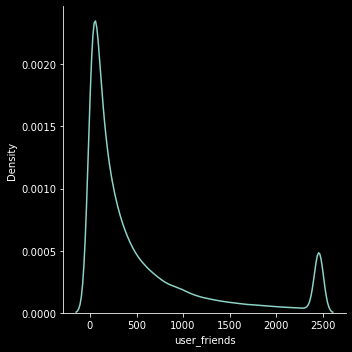

In [22]:
sns.displot(data=df1, x='user_friends', kind='kde')

### user_followers

In [23]:
df1['user_followers'].describe().apply("{0:.2f}".format)

count      489626.00
mean         2926.19
std         76625.21
min             0.00
25%            15.00
50%            75.50
75%           371.75
max      23770586.00
Name: user_followers, dtype: object

Assim como as outras duas vari√°veis num√©ricas, temos uma distribui√ß√£o positivamente assim√©trica. Usu√°rios t√™m m√©dia de 2926 seguidores, mas mediana de 76

In [24]:
#Retirando outliers para olhar melhor para o coluna
iqr = df1['user_followers'].quantile(0.75) - df1['user_friends'].quantile(0.25)
upper_limit = df1['user_followers'].quantile(0.75) + iqr*3
df1.loc[df1['user_followers']>upper_limit, 'user_followers'] = upper_limit

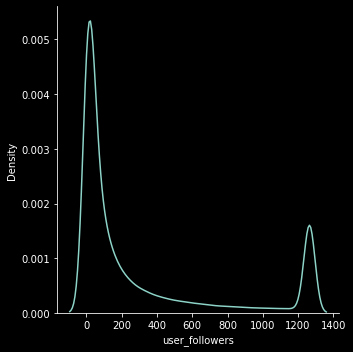

In [25]:
sns.displot(data=df1, x='user_followers', kind='kde')

### user_name
Vamos ver se conseguimos extrair informa√ß√µes sobre os usu√°rios a partir de seus nomes

In [26]:
keywords_crypto = ['bitcoin', 'cr(?:y|i)pto', 'ethereum']
for word in keywords_crypto:
    df1[f'{word}_in_name'] = df1['user_name'].str.lower().str.contains(word)

In [27]:
for word in keywords_crypto:
    print(word)
    media = df1[f'{word}_in_name'].mean()
    print(f"{media:.3%} dos usu√°rios t√™m refer√™ncia ao termo '{word}' em seu nome")
    print()

bitcoin
1.143% dos usu√°rios t√™m refer√™ncia ao termo 'bitcoin' em seu nome

cr(?:y|i)pto
6.881% dos usu√°rios t√™m refer√™ncia ao termo 'cr(?:y|i)pto' em seu nome

ethereum
0.033% dos usu√°rios t√™m refer√™ncia ao termo 'ethereum' em seu nome



Vemos que uma parte relevante dos usu√°rios que tu√≠ta sobre bitcoin est√° ligado ao tema das criptomoedas. 

ps: 'cr(?:y|i)pto' √© uma express√£o regular para que tanto crypto quanto cripto atendam ao crit√©rio.

In [28]:
df1['any_crypto_in_name'] = df1[[w+'_in_name' for w in keywords_crypto]].any(axis=1)
print(f"{df1['any_crypto_in_name'].mean():.3%} dos usu√°rios t√™m refer√™ncia a uma das palavras chaves relacionadas a crptomoedas (bitcoin, cripto, ethereum) em seu nome")

8.018% dos usu√°rios t√™m refer√™ncia a uma das palavras chaves relacionadas a crptomoedas (bitcoin, cripto, ethereum) em seu nome


8% t√™m pelo menos uma das palavras-chave selecionadas no nome

### user_description

In [29]:
for word in keywords_crypto:
    df1[f'{word}_in_description'] = df1['user_description'].str.lower().str.contains(word)

In [30]:
for word in keywords_crypto:
    print(word)
    media = df1[f'{word}_in_description'].mean()
    print(f"{media:.3%} dos usu√°rios t√™m refer√™ncia ao termo '{word}' em sua descri√ß√£o")
    print()

bitcoin
15.315% dos usu√°rios t√™m refer√™ncia ao termo 'bitcoin' em sua descri√ß√£o

cr(?:y|i)pto
22.499% dos usu√°rios t√™m refer√™ncia ao termo 'cr(?:y|i)pto' em sua descri√ß√£o

ethereum
1.364% dos usu√°rios t√™m refer√™ncia ao termo 'ethereum' em sua descri√ß√£o



As descri√ß√µes dos usu√°rios tamb√©m indiam que os tweets sobre bitcoin costumam vir de pessoas que t√™m rela√ß√£o consolidada com o tema das criptomoedas

In [31]:
df1['any_crypto_in_description'] = df1[[w+'_in_description' for w in keywords_crypto]].any(axis=1)
print(f"{df1['any_crypto_in_description'].mean():.3%} dos usu√°rios t√™m refer√™ncia a uma das palavras chaves relacionadas a crptomoedas (bitcoin, cripto, ethereum) na sua descri√ß√£o")

28.009% dos usu√°rios t√™m refer√™ncia a uma das palavras chaves relacionadas a crptomoedas (bitcoin, cripto, ethereum) na sua descri√ß√£o


In [32]:
df1['any_crypto_in_name_description'] = df1[['any_crypto_in_description', 'any_crypto_in_name']].any(axis=1)
print(f"{df1['any_crypto_in_name_description'].mean():.3%} dos usu√°rios t√™m refer√™ncia a uma das palavras chaves relacionadas a crptomoedas (bitcoin, cripto, ethereum) em seu nome ou descri√ß√£o")

30.724% dos usu√°rios t√™m refer√™ncia a uma das palavras chaves relacionadas a crptomoedas (bitcoin, cripto, ethereum) em seu nome ou descri√ß√£o


Considerando o nome do usu√°rio e a descri√ß√£o, quase um ter√ßo (30%) dos autores de tweets sobre bitcoin trazem alguma palavra relacionada a criptomoedas em seu perfil. Isso nos indica mais uma vez que os tweets sobre bitcoin s√£o produzidos, em larga escala, por usu√°rios realmente ligados ao tema.

### Contagem de postagens por usu√°rio

In [33]:
df1['tweet_count'].describe()

count    489707.000000
mean          5.779562
std          67.129778
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max       13137.000000
Name: tweet_count, dtype: float64

Aqui temos de novo uma m√©dia maior que a mediana, o que indica uma distriubui√ß√£o assim√©trica positivamente. Chama aten√ß√£o que a mediana seja 1, o que significa que a maioria dos usu√°rios t√™m apenas um tweet sobre o assunto. Ou seja, essa informa√ß√£o nos indica que h√° tamb√©m um grande n√∫mero de usu√°rios que fala sobre bitcoin de maneira mais casual

In [34]:
#Retirando outliers para olhar melhor para o coluna
upper_limit = df1['tweet_count'].quantile(0.99)
df1.loc[df1['tweet_count']>upper_limit, 'tweet_count'] = upper_limit

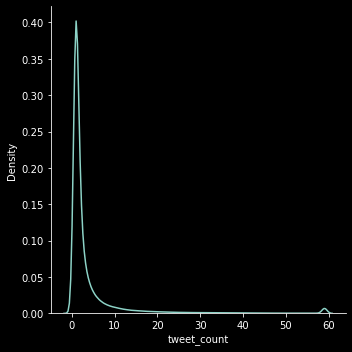

In [35]:
sns.displot(data=df1, x='tweet_count', kind='kde')

### user_location

In [36]:
#Geographic imports
from geotext import GeoText
from geopy.geocoders import Nominatim
from folium.plugins import FastMarkerCluster, MarkerCluster
import folium

In [37]:
#Helper functions

geolocator = Nominatim(user_agent='f', timeout=3)
def get_lat_lon(string):
    info =  geolocator.geocode(string)
    try:
        return pd.Series([info.latitude, info.longitude])
    except:
        return (0,0)

def get_country(string):
    list_of_countries = GeoText(str(string)).countries
    if len(list_of_countries) > 0:
        return list_of_countries[0]
    return ''

def get_city(string):
    list_of_cities = GeoText(str(string)).cities
    if len(list_of_cities) > 0:
        return list_of_cities[0]
    return ''

def get_country_or_city(string):
    gtxt = GeoText(str(string))
    list_of_countries = gtxt.countries
    if len(list_of_countries) > 0:
        return list_of_countries[0]
    
    list_of_cities = gtxt.cities
    if len(list_of_cities) > 0:
        return list_of_cities[0]
    return ''

In [38]:
locations = df1['user_location'].unique()
len(locations)

69803

In [39]:
location_country = {loc: get_country(loc) for loc in locations}
location_city = {loc: get_city(loc) for loc in locations}
location_country_or_city = {loc: get_country_or_city(loc) for loc in locations}

In [40]:
df1['country'] = df1['user_location'].map(location_country)
df1['city'] = df1['user_location'].map(location_city)
df1['country_or_city'] = df1['user_location'].map(location_country_or_city)

In [41]:
print(f"Usu√°ruios sem pa√≠s: {(df1['country'] == '').mean():.2%}")
print(f"Usu√°ruios sem cidade: {(df1['city'] == '').mean():.2%}")
print(f"Usu√°ruios sem pa√≠s ou cidade: {(df1['country_or_city'] == '').mean():.2%}")

Usu√°ruios sem pa√≠s: 86.11%
Usu√°ruios sem cidade: 81.79%
Usu√°ruios sem pa√≠s ou cidade: 72.20%


Em 72% dos usu√°rios, n√£o foi poss√≠vel extrai sua localiza√ß√£o do campo user_location. As an√°lises sobre localiza√ß√£o, portanto, v√£o focar nos restantes 28% dos usu√°rios

Vamos olhar para a frequ√™ncia de presen√ßa de cada local. Para isso, vamos excluir usu√°riod cuja localiza√ß√£o n√£o pudemos determinar. Assim, pode-se olhar melhor para a distribui√ß√£o dos usu√°rio pelo mundo

In [42]:
# 10 pa√≠ses mais frequentes sua frequ√™ncia dentre todos os usu√°rios com algum pa√≠s no campo user_location
df1['country'].loc[df1['country'] != ''].value_counts(1).map('{:.2%}'.format).head(10)

India             15.50%
United States      8.76%
Indonesia          7.69%
Nigeria            6.62%
Bangladesh         5.39%
United Kingdom     4.86%
Canada             4.47%
Australia          3.28%
Pakistan           2.62%
France             2.55%
Name: country, dtype: object

In [43]:
# 10 cidades mais frequentese e sua frequ√™ncia dentre todos os usu√°rios com alguma cidade no campo user_location
df1['city'].loc[df1['city'] != ''].value_counts(1).map('{:.2%}'.format).head(10)

London         5.63%
New York       4.72%
Los Angeles    3.15%
Dhaka          1.79%
Lagos          1.76%
Toronto        1.69%
Florida        1.50%
Miami          1.50%
Chicago        1.41%
New Delhi      1.37%
Name: city, dtype: object

In [44]:
# 10 locais (pa√≠s ou cidade) mais frequentes e sua frequ√™ncia dentre todos os usu√°rios com local preenchdo
df1['country_or_city'].loc[df1['country_or_city'] != ''].value_counts(1).map('{:.2%}'.format).head(10)

India             7.75%
United States     4.38%
Indonesia         3.84%
London            3.55%
Nigeria           3.31%
New York          3.07%
Bangladesh        2.70%
United Kingdom    2.43%
Canada            2.24%
Los Angeles       2.05%
Name: country_or_city, dtype: object

Vamos agora exibir esses dados em um mapa mundi. Como o processo de obter latitude e longitude de cada local leva bastante tempo, vamos considerar s√≥ os 1000 locais mais frequentes no dataset.

Com essa quantidade, o processo leva cerca de 10 minutos. Se o seu computador indicar um tempo muito maior, vc pode diminuir o n√∫mero de lugares alterando a vari√°vel n_places

In [45]:
n_places = 1000
places_to_plot = list(df1['country_or_city'].value_counts().iloc[1:n_places+1].index)
places_loc = {place: get_lat_lon(place) for place in tqdm(places_to_plot)}

  0%|          | 0/1000 [00:00<?, ?it/s]

In [46]:
lats = {place: places_loc[place][0] for place in places_loc.keys()}
lons = {place: places_loc[place][1] for place in places_loc.keys()}

In [47]:
df1['lat'] = df1['country_or_city'].map(lats)
df1['lon'] = df1['country_or_city'].map(lons)

In [48]:
world_map = folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)

In [49]:
df2 = df1.loc[~df1['lon'].isna()].copy()
world_map.add_child(FastMarkerCluster(df2[['lat', 'lon']].values.tolist()))
world_map

No mapa acima, podemos ver as 500 localiza√ß√µes mais frequentes dos usu√°rios que tweetam sobre bitcoin. Conforme o zoom aumenta e diminui, o mapa agrega os valores.
Pode-se alguns clusters mais importantes, sendo os principais nos Estados Unidos, na Europa e na √çndia.

## Rela√ß√µes entre colunas

In [50]:
types = ['bool', 'float64', 'int64']
df3 = df1.select_dtypes(include=types).copy()
df3.drop(['lat', 'lon'], axis=1, inplace=True)

<AxesSubplot:>

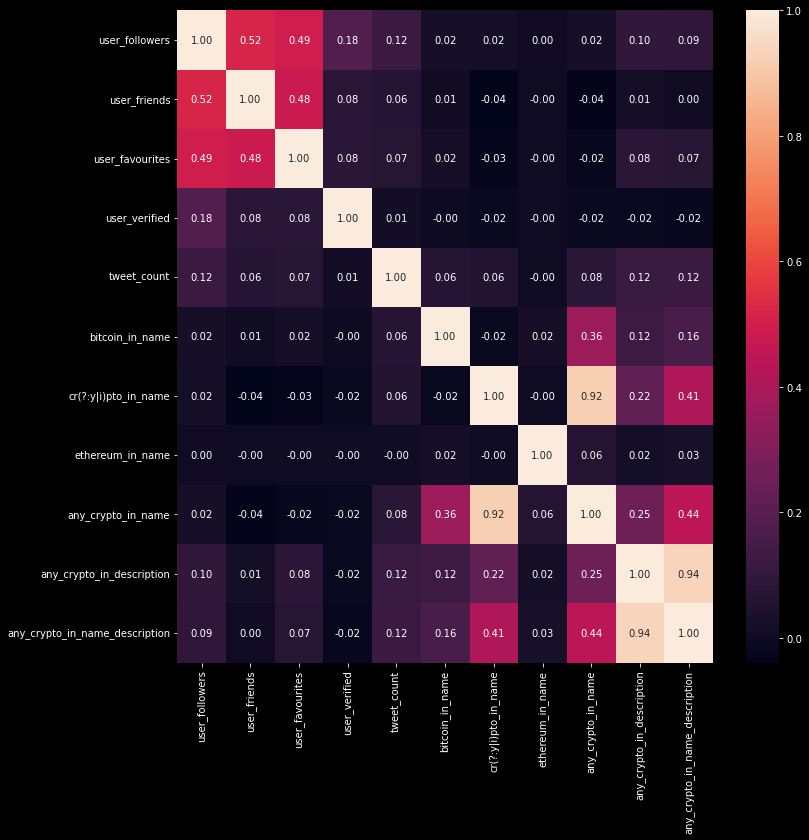

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sns.heatmap(df3.corr(), annot=True, fmt='.2f')

- Como era de se esperar, as vari√°veis user_followers, user_favourites e user_friends t√™m alta correla√ß√£o entre si.
- Tamb√©m era de se esperar a correla√ß√£o encontrada entre a coluna user_followers e as colunas user_verified e tweet_count. (usu√°rio com mais seguidors t√™m maior chance de serem verificados e tweetam mais)
- As colunas criadas a partir de palavras-chaves tamb√©m mostram uma correla√ß√£o relevante
- A coluna tweet_count tamb√©m mostra rela√ß√£o com o aparecimento de palavras-chave no nome e na descri√ß√£o. Isso indica que os usu√°rios que colocam essa palavra-chave costumam tweetar mais sobre o assunto

## Conclus√µes

A partir da an√°lise, pode-se tirar algumas conclus√µes sobre os usu√°rios:


- N√£o h√° uma grande representa√ß√£o de usu√°rios verificados (<1%). Talvez essa propor√ß√£o seja maior do que a geral no twitter, mas essa informa√ß√£o n√£o est√° no dataset
- A maioria dos usu√°rios que tweeta sobre bitcoin teve a conta criada entre 2019 e 2022. H√° um aumento significativo a partir de 2020
- Boa parte dos tweets v√™m de plataformas m√≥veis (android e Apple), o que indica que os usu√°rio usam bastante o celular para tweetar sobre bitcoin
- Os usu√°rios t√™m m√©dia de 5226 favoritos, com mediana 586. Os usu√°rios t√™m m√©dia de 732 amigos, com mediana 236. Os usu√°rios t√™m m√©dia de 2926 seguidores, com mediana 76. S√£o tr√™s distribui√ß√µes com relevante assimetria positiva. Ou seja, uma minoria dos usu√°rios t√™m n√∫meros muito mais altos em rela√ß√£o ao restante, o que aumenta a m√©dia do dataset.
- 30% dos usu√°rios tem alguma palavra chave relacionada a criptomoedas (bitcoin, crypto, ehereum) em sua descri√ß√£o ou em seu nome. Isso indica que os tweets sobre o assunto s√£o feitos, em boa parte, por usu√°rio com rela√ß√£o pr√≥xima ao tema
- A mediana de postagens por usu√°rio √© apenas 1, ou seja, mais da metade dos usu√°rios do dataset tem apenas uma postagem sobre o assunto. Essa informa√ß√£o nos indica que h√° tamb√©m um grande n√∫mero de usu√°rios que fala sobre bitcoin de maneira mais casual
- Uma parte relavante dos usu√°rios que tweetaram sobre bitcoin est√° concentrada em tr√™s clusters: Estados Unidos, Europa Ocidental e √çndia (com Paquist√£o e Bangladesh)
- Usu√°rios com mais seguidores t√™m tamb√©m mais amigos e mais favoritos. E isso vale pra compara√ß√£o de qualquer um dessas 3 em rela√ß√£o √†s outras duas.
- Usu√°rio com mais seguidores t√™m maior probabilidade de serem verificados e tem mais tweets
- O n√∫mero de tweets mostrou rela√ß√£o relavante com a presen√ßa de palavras-chave cripto no nome ou na descri√ß√£o. Isso indica que os usu√°rios que usam essas palavras em ser perfil tweetam mais sobre o assunto